<a href="https://colab.research.google.com/github/Shantnu-Talokar/DeepLearningLab/blob/main/DLPractical4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Normalize the pixel values (0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Step 3: Define Neural Network Architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),        # Input Layer (28x28 image → 784 vector)
    Dense(128, activation='relu'),        # First hidden layer (128 neurons, ReLU)
    Dense(64, activation='relu'),         # Second hidden layer (64 neurons, ReLU)
    Dense(10, activation='softmax')       # Output layer (10 classes, Softmax)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Convert output labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 4: Train the model (Epoch = 10)
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8694 - loss: 0.4440 - val_accuracy: 0.9637 - val_loss: 0.1225
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9649 - loss: 0.1123 - val_accuracy: 0.9753 - val_loss: 0.0879
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9780 - loss: 0.0721 - val_accuracy: 0.9743 - val_loss: 0.0800
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9833 - loss: 0.0541 - val_accuracy: 0.9780 - val_loss: 0.0768
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9873 - loss: 0.0409 - val_accuracy: 0.9787 - val_loss: 0.0752
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9896 - loss: 0.0319 - val_accuracy: 0.9795 - val_loss: 0.0739
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9926 - loss: 0.0235 - val_accuracy: 0.9805 - val_loss: 0.0807
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9924 - loss: 0.0238 -

In [6]:
# Step 5: Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9744 - loss: 0.1062

Test Accuracy: 97.68%
Test Loss: 0.0944


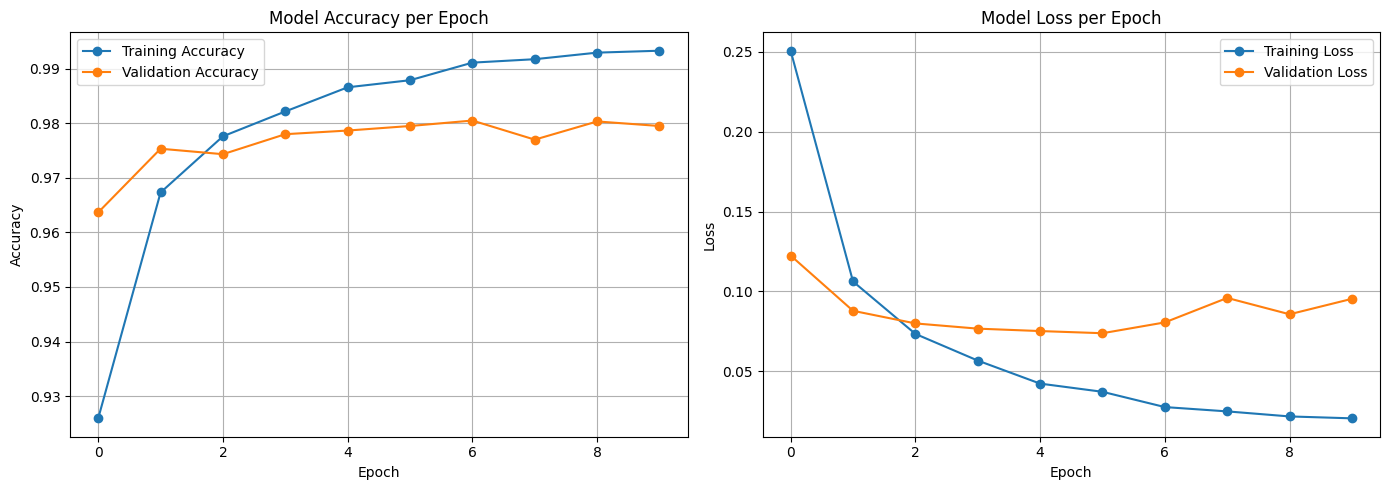

In [7]:
# Create subplots: 1 row, 2 columns
plt.figure(figsize=(14, 5))

# Plot 1: Accuracy per Epoch
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker= 'o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker = 'o')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot 2: Loss per Epoch
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker = 'o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker = 'o')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show both plots
plt.tight_layout()
plt.show()